In [22]:
import pickle
import numpy as np

with open('accuracy.dat') as f:
    aucs, confs, labels = pickle.load(f)
f.close()

with open('top10.dat') as f:
    state_top10 = pickle.load(f)
f.close()

auc = list(np.array([]) for i in range(len(state_top10)))
for (i,state) in enumerate(state_top10):
    auc[i] = np.array([])
    for (j,lab) in enumerate(labels):
        if state in lab:
            ind = np.where(lab==state)[0]
            auc[i] = np.append(auc[i], aucs[j][ind])

auc_mean = np.array([])
auc_ci = np.array([])
for (i, a) in enumerate(auc):
    print state_top10[i]
    auc_mean = np.append(auc_mean, np.nanmean(a))
    auc_ci = np.append(auc_ci, 2*np.nanstd(a)/np.sqrt(208))


"Nightlife Spot (Bar, Club)"
"Spiritual (Church, Temple, Etc.)"
"Outdoors & Recreation"
"Arts & Entertainment (Theater, Music Venue, Etc.)"
"Work"
"Professional or Medical Office"
"Another's Home"
"Food (Restaurant, Cafe)"
"Home"
"Shop or Store"


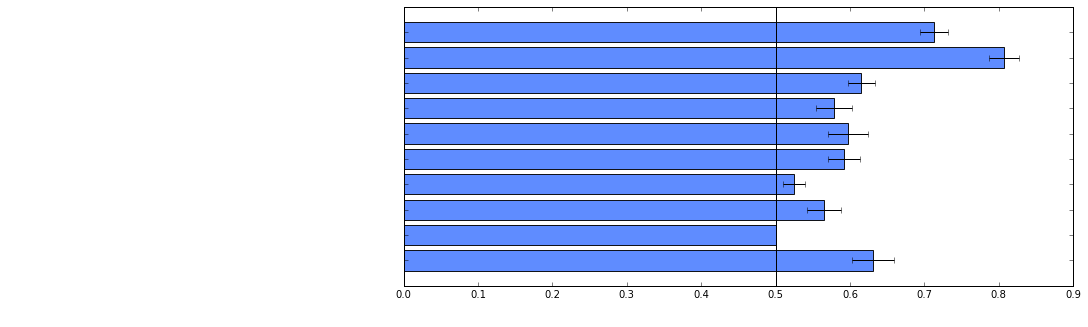

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,5))
plt.barh(range(len(auc_mean)), auc_mean, xerr=auc_ci, align='center', color=(.3,.5,1), alpha=0.9, ecolor=(0,0,0))
plt.xlabel('AUC',fontsize=15,color=(1,1,1))
axes = plt.gca()
axes.set_ylim([-1, len(auc_mean)])
plt.yticks(range(len(auc_mean)), state_top10, fontsize=15, color=(1,1,1));
plt.plot([.5, .5], [-1, len(auc_mean)],color=(0,0,0))
